In [1]:
from sklearn.datasets import fetch_openml
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
mnist = fetch_openml("mnist_784", data_home="data/mnist_784", cache=True)

In [3]:
zipped_mnist = list(zip(mnist.data, mnist.target))
mnist_random = random.sample(zipped_mnist, 10000)
x, y = zip(*(mnist_random))
x = np.asarray(x)
y = np.asarray(y)

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(30)
x_pca = pca.fit_transform(x_scaled)

In [5]:
x_embedded = TSNE(n_components=2).fit_transform(x_pca)

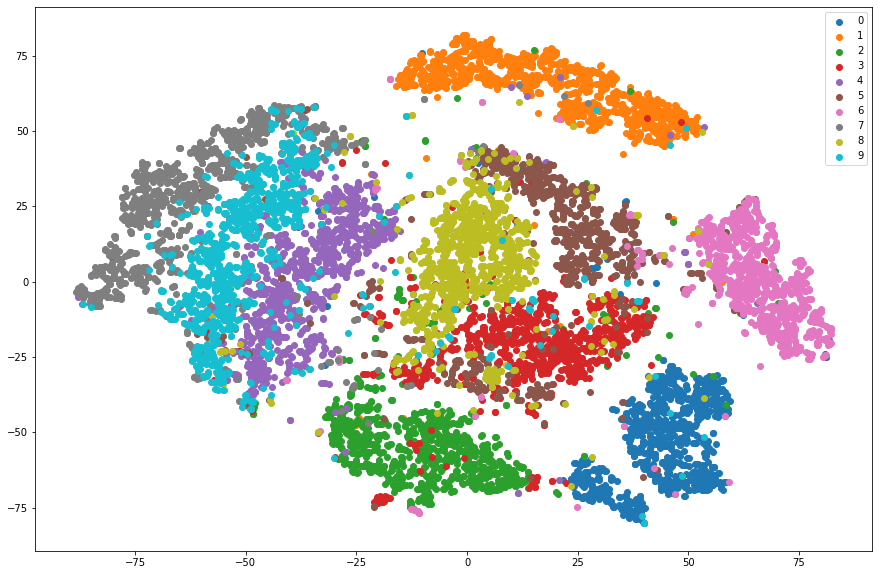

In [6]:
plt.figure(figsize=(15,10))

for c, ids in zip(mcolors.TABLEAU_COLORS, [str(i) for i in range(10)]):
    plt.scatter(x_embedded[y == ids, 0], x_embedded[y == ids, 1], c=c, label=ids)
plt.legend()
plt.show()

In [7]:
# wybrano 3 i 8
digit_filter = np.where((y == '3') | (y == '8'))
x_filtered, y_filtered = x_pca[digit_filter], y[digit_filter]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, train_size=0.8)
x_train.shape

(1575, 30)

In [9]:
classifier = BaggingClassifier(base_estimator=SVC(), n_estimators=5, max_samples=0.4)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.9619289340101523

In [76]:
def ensemble(f1, Clf, estimators=[5], samples=[1.0], features=[1.0],params={}):
    result = pd.DataFrame()
    for n_estimators in estimators:
        for max_samples in samples:
            for max_features in features:
                clf = Clf(max_features=max_features, n_estimators=n_estimators, max_samples=max_samples, **params)
                clf.fit(x_train, y_train)
                if f1:
                    pred = clf.predict(x_test)
                    if len(estimators) == 1:
                        result.at[max_samples, max_features] = f1_score(y_test, pred, average='weighted')
                    elif len(samples) == 1:
                        result.at[n_estimators, max_features] = f1_score(y_test, pred, average='weighted')
                    else:
                        result.at[n_estimators, max_samples] = f1_score(y_test, pred, average='weighted')
                else:
                    if len(estimators) == 1:
                        result.at[max_samples, max_features] = clf.score(x_test, y_test)
                    elif len(samples) == 1:
                        result.at[n_estimators, max_features] = clf.score(x_test, y_test)
                    else:
                        result.at[n_estimators, max_samples] = clf.score(x_test, y_test)
    return result
    
def draw_heatmap(results):
    plt.figure(figsize=(10,10))
    g=sns.heatmap(results,annot=True,cmap="YlGnBu")
    

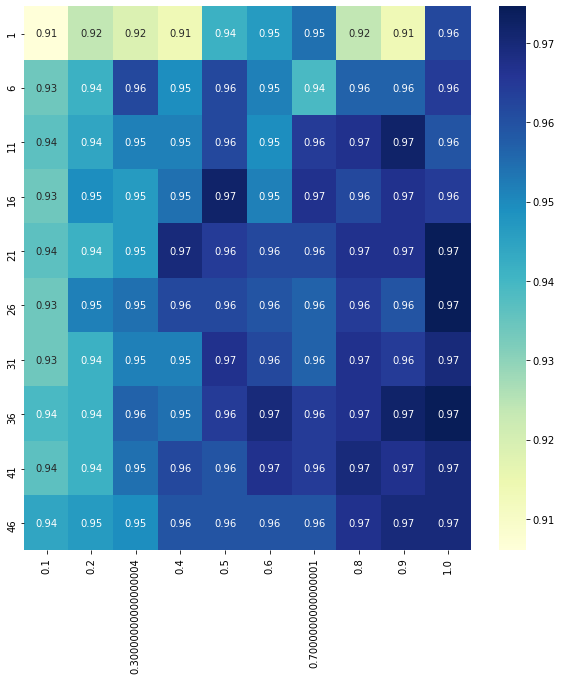

In [80]:
estimators = range(1, 50, 5)
samples = np.arange(0.1, 1.0, 0.1)

params = {"base_estimator": SVC(),
                 "bootstrap_features": True}

draw_heatmap(ensemble(False,BaggingClassifier, estimators=estimators, samples=samples, params=params))

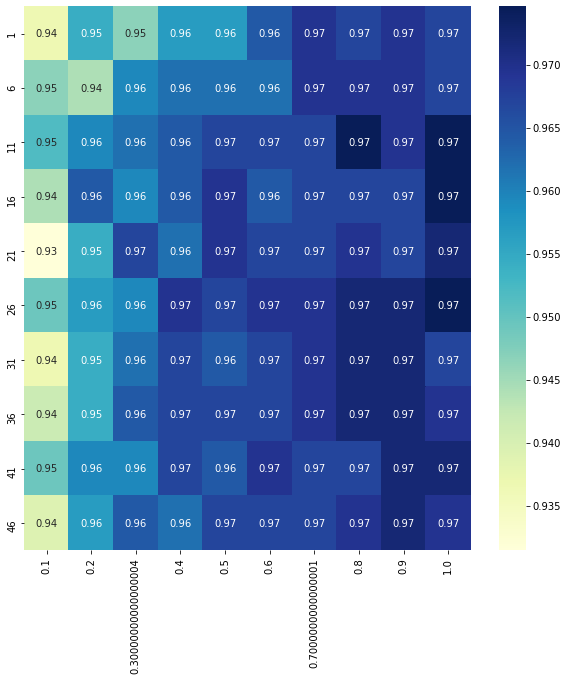

In [21]:
import seaborn as sns
plt.figure(figsize=(10,10))
g=sns.heatmap(results,annot=True,cmap="YlGnBu")

In [ ]:
f1 dla baggingu

In [29]:
from sklearn.metrics import f1_score

estimators = range(1, 50, 5)
samples = np.arange(0.1, 1.1, 0.1)

results_f1 = pd.DataFrame()

for n_estimators in estimators:
    for max_samples in samples:
        clf = BaggingClassifier(base_estimator=SVC(), n_estimators=n_estimators, max_samples=max_samples)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        results_f1.at[n_estimators, max_samples] = f1_score(y_test, pred, average='weighted')
results_f1

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1,0.931436,0.946692,0.954310,0.951769,0.961923,0.964466,0.972077,0.974619,0.977156,0.969540
6,0.939009,0.939009,0.954272,0.959374,0.964459,0.961909,0.969536,0.969536,0.972077,0.969536
11,0.938986,0.954285,0.961917,0.959374,0.964459,0.967000,0.967000,0.972080,0.974617,0.966995
16,0.944092,0.951751,0.961917,0.967000,0.964459,0.967000,0.969536,0.967000,0.967000,0.969540
21,0.933901,0.954285,0.967000,0.964459,0.967000,0.967000,0.969536,0.969536,0.967000,0.969540
26,0.944111,0.954296,0.959374,0.964459,0.969536,0.969536,0.967000,0.972077,0.967000,0.974617
31,0.939009,0.959374,0.967000,0.964459,0.967000,0.967000,0.967000,0.972080,0.969540,0.972080
36,0.938986,0.959374,0.959374,0.967000,0.967000,0.967000,0.967000,0.969540,0.969536,0.969540
41,0.946642,0.954285,0.964459,0.964459,0.967000,0.967000,0.967000,0.972077,0.972077,0.969536
46,0.933872,0.951739,0.961917,0.967000,0.967000,0.969536,0.969540,0.967000,0.972077,0.969540


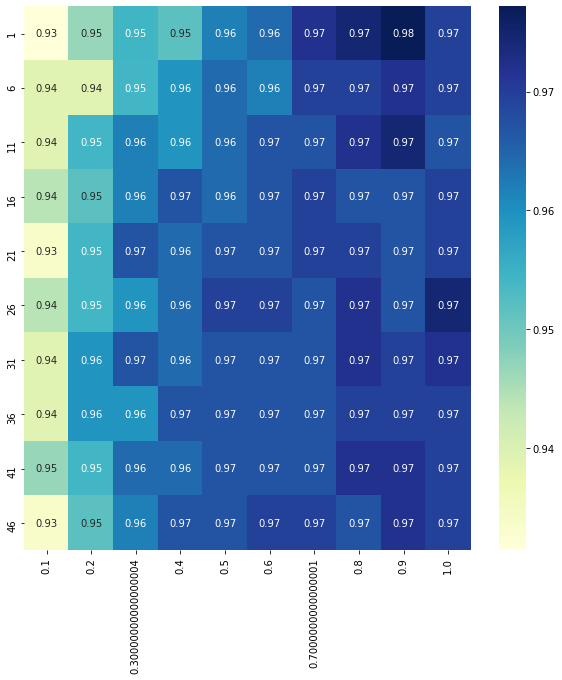

In [31]:
plt.figure(figsize=(10,10))
g=sns.heatmap(results_f1,annot=True,cmap="YlGnBu")

In [ ]:
f1 dla subspace

In [32]:
estimators = range(1, 50, 5)
features = np.arange(0.1, 1.1, 0.1)

results_features = pd.DataFrame()

for n_estimators in estimators:
    for max_features in features:
        clf = BaggingClassifier(base_estimator=SVC(), bootstrap_features=True, n_estimators=n_estimators, 
                                max_features=max_features)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        results_features.at[n_estimators, max_features] = f1_score(y_test, pred, average='weighted')

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1,0.763005,0.755438,0.801847,0.898215,0.923826,0.918706,0.946697,0.944161,0.954315,0.967000
6,0.791443,0.903194,0.928868,0.946642,0.933901,0.944126,0.951739,0.966995,0.956839,0.959353
11,0.872452,0.918729,0.936545,0.961909,0.961927,0.959381,0.964459,0.974619,0.977156,0.979695
16,0.849321,0.918648,0.946673,0.964459,0.956839,0.964452,0.954296,0.964459,0.967003,0.967000
21,0.916243,0.931397,0.956853,0.951769,0.956839,0.961917,0.964463,0.964466,0.969540,0.959387
26,0.903491,0.936479,0.954272,0.949218,0.951739,0.961917,0.964463,0.967000,0.972077,0.967000
31,0.895885,0.941594,0.959374,0.959381,0.961923,0.969540,0.964459,0.959387,0.967000,0.967000
36,0.911139,0.933901,0.944126,0.959381,0.959381,0.961923,0.967000,0.966995,0.967000,0.972077
41,0.908620,0.931397,0.961917,0.951739,0.961917,0.972080,0.964463,0.964463,0.974619,0.969536
46,0.885461,0.941515,0.936499,0.951761,0.964459,0.961923,0.974617,0.969542,0.961923,0.974619


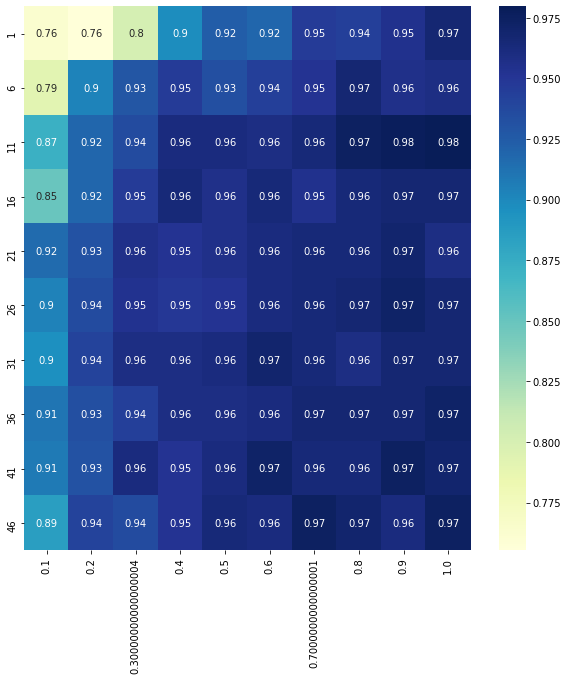

In [33]:
plt.figure(figsize=(10,10))
g=sns.heatmap(results_features,annot=True,cmap="YlGnBu")

In [37]:
samples = np.arange(0.1, 1.1, 0.1)
features = np.arange(0.1, 1.1, 0.1)

results_features = pd.DataFrame()

for max_samples in samples:
    for max_features in features:
        clf = BaggingClassifier(base_estimator=SVC(), bootstrap_features=True, n_estimators=5, 
                                max_features=max_features, max_samples=max_samples)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        results_features.at[max_features, max_samples] = f1_score(y_test, pred, average='weighted')

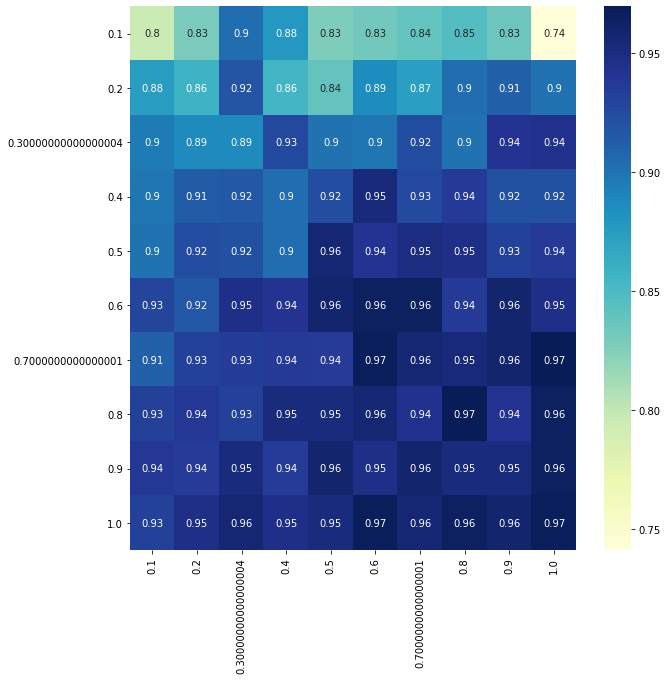

In [38]:
plt.figure(figsize=(10,10))
g=sns.heatmap(results_features,annot=True,cmap="YlGnBu")

In [45]:
samples = np.arange(0.1, 1.0, 0.1)
features = np.arange(0.1, 1.0, 0.1)

results_random_forest = pd.DataFrame()

for max_samples in samples:
    for max_features in features:
        clf = RandomForestClassifier(n_estimators=5, 
                                max_features=max_features, max_samples=max_samples)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        results_random_forest.at[max_features, max_samples] = f1_score(y_test, pred, average='weighted')
results_random_forest

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0.1,0.870317,0.895938,0.877792,0.918763,0.906062,0.890857,0.906018,0.895745,0.916048
0.2,0.913670,0.878019,0.908627,0.923809,0.916152,0.903531,0.916152,0.921307,0.923826
0.3,0.888325,0.880618,0.913686,0.900999,0.913670,0.918729,0.923787,0.913670,0.921295
0.4,0.885780,0.895858,0.906091,0.895858,0.893302,0.900907,0.926316,0.923787,0.936528
0.5,0.890422,0.906018,0.918679,0.926358,0.890609,0.918773,0.911071,0.928785,0.921234
0.6,0.862817,0.916217,0.911002,0.906042,0.918763,0.934003,0.926384,0.906018,0.939085
0.7,0.895788,0.908620,0.913625,0.885727,0.903304,0.916200,0.921279,0.926259,0.921234
0.8,0.888184,0.900938,0.903431,0.921295,0.926358,0.931436,0.931450,0.918706,0.931461
0.9,0.898215,0.931373,0.926358,0.895643,0.921279,0.916178,0.928888,0.923762,0.911098


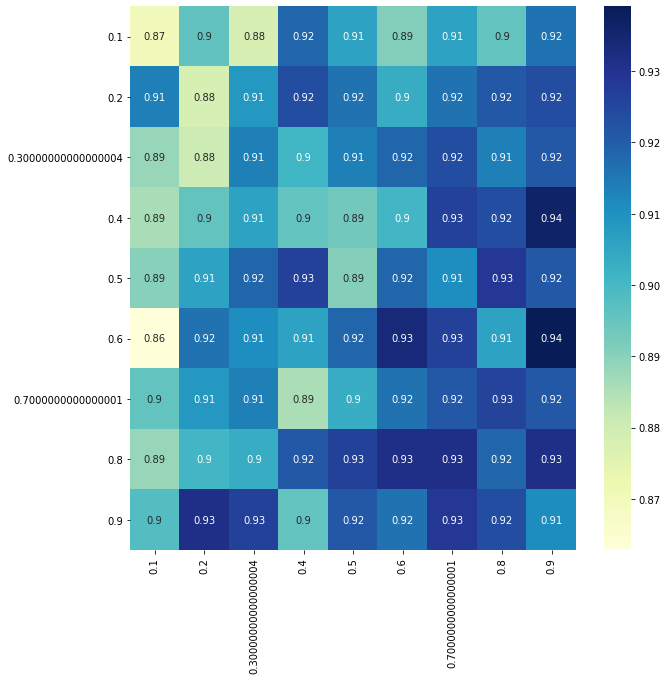

In [46]:
plt.figure(figsize=(10,10))
g=sns.heatmap(results_random_forest,annot=True,cmap="YlGnBu")